**Statement 1: Apply K-Means Clustering technique of machine learning to solve the given problem.
We have given a collection of 8 points. P1=[0.1,0.6] P2=[0.15,0.71] P3=[0.08,0.9] 
P4=[0.16, 0.85] P5=[0.2,0.3] P6=[0.25,0.5] P7=[0.24,0.1] P8=[0.3,0.2]. Perform the kmean clustering with initial centroids as m1=P1 =Cluster#1=C1 and m2=P8=cluster#2=C2. 
Answer the following 
1] Which cluster does P6 belongs to? 
2] What is the population of cluster around m2? 
3] What is updated value of m1 and m2? 
4] What is the best value of K for the given problem**

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans

In [128]:
X = [[0.1,0.6],[0.15,0.71],[0.08,0.9],[0.16,0.85],[0.2,0.3],[0.25,0.5],[0.24,0.1],[0.3,0.2]]
df=np.array(X)
df

array([[0.1 , 0.6 ],
       [0.15, 0.71],
       [0.08, 0.9 ],
       [0.16, 0.85],
       [0.2 , 0.3 ],
       [0.25, 0.5 ],
       [0.24, 0.1 ],
       [0.3 , 0.2 ]])

In [129]:
centroids = np.array([[0.1,0.6],[0.3,0.2]])

In [130]:
model=KMeans(n_clusters=2, init=centroids, random_state=0)
model.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


KMeans(init=array([[0.1, 0.6],
       [0.3, 0.2]]), n_clusters=2,
       random_state=0)

In [131]:
print("labels", model.labels_)

labels [0 0 0 0 1 0 1 1]


In [132]:
print("P6 Belongs to:", model.predict([[0.25,0.5]]))

P6 Belongs to: [0]


In [133]:
print("population around cluster m2 is: ", np.count_nonzero(model.labels_==1))

population around cluster m2 is:  3


In [134]:
print("updated value of m1 and m2 is: ", model.cluster_centers_)

updated value of m1 and m2 is:  [[0.148      0.712     ]
 [0.24666667 0.2       ]]


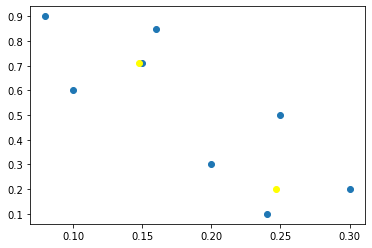

In [135]:
plt.scatter(df[:,0], df[:,1])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='yellow')

plt.show()


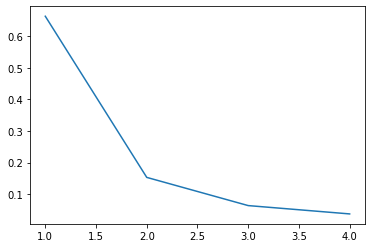

In [136]:
#elbow
wcss = []
for i in range(1,5):
  kmeanss=KMeans(n_clusters=i,init="k-means++")
  kmeanss.fit(X)
  wcss.append(kmeanss.inertia_)

plt.plot(range(1,5),wcss)
plt.show()


In [137]:
print("Best value for k is : 2 ")

Best value for k is : 2 


**Statement 2: Apply K-Means Clustering technique of machine learning to analyze the Iris dataset.
Use Elbow method to find best value of K.**

In [138]:
from sklearn import datasets

In [139]:
iris=datasets.load_iris()
X=iris.data

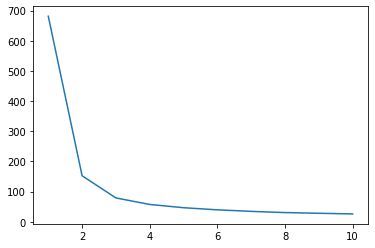

In [140]:
wcss=[]
for i in range(1,11):
  kmeaans=KMeans(n_clusters=i,init="k-means++")
  kmeaans.fit(X)
  wcss.append(kmeaans.inertia_)
plt.plot(range(1,11),wcss)
plt.show()

In [141]:
kmeaans=KMeans(n_clusters=3,init="k-means++")
kmeaans.fit(X)
print("labels", kmeaans.labels_)
y_means=kmeaans.predict(X)
print(y_means)

labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


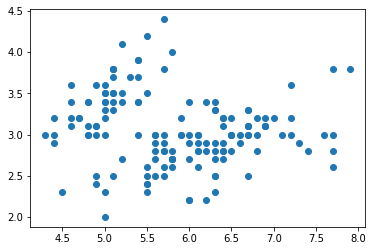

In [142]:
#Before Predicition
plt.scatter(X[:,0],X[:,1])
plt.x_label="Sepal Length"
plt.y_label="Sepal Width"
plt.show()

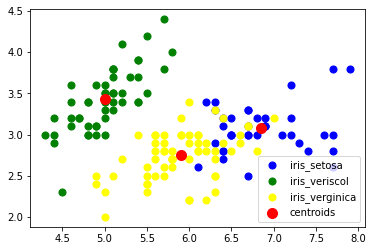

In [143]:

#After Predcition
plt.scatter(X[y_means==0,0],X[y_means==0,1],c='blue',s=50,label="iris_setosa")
plt.scatter(X[y_means==1,0],X[y_means==1,1],c='green',s=50,label="iris_veriscol")
plt.scatter(X[y_means==2,0],X[y_means==2,1],c='yellow',s=50,label="iris_verginica")
plt.scatter(kmeaans.cluster_centers_[:,0],kmeaans.cluster_centers_[:,1],c="red",s=100,label="centroids")
plt.legend()
plt.show()


**Statement 3: Apply K-Means Clustering technique of machine learning to analyze the Boston 
dataset. 
Use Elbow method to find best value of K.**

In [144]:
from sklearn import datasets

In [145]:
boston=datasets.load_boston()
Z=boston.data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

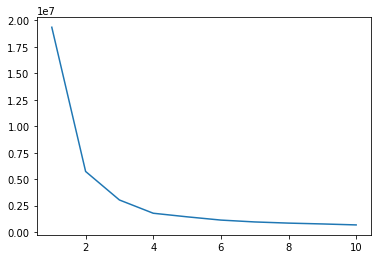

In [146]:
wcss=[]
for i in range(1,11):
  kmeaans=KMeans(n_clusters=i,init="k-means++")
  kmeaans.fit(Z)
  wcss.append(kmeaans.inertia_)
plt.plot(range(1,11),wcss)
plt.show()

In [147]:
kmeaans=KMeans(n_clusters=3,init="k-means++")
kmeaans.fit(Z)
print("labels", kmeaans.labels_)
y_means=kmeaans.predict(Z)

labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0

In [148]:
print("best value of k is: 3")

best value of k is: 3


In [149]:
# plt.scatter(X[y_means==0,0],X[y_means==0,1],c='blue',s=50,label="iris_setosa")
# plt.scatter(X[y_means==1,0],X[y_means==1,1],c='green',s=50,label="iris_veriscol")
# plt.scatter(X[y_means==2,0],X[y_means==2,1],c='yellow',s=50,label="iris_verginica")
# plt.scatter(kmeaans.cluster_centers_[:,0],kmeaans.cluster_centers_[:,1],c="red",s=100,label="centroids")
# plt.legend()
# plt.show()

**Statement 4: Apply Linear Regression technique to solve the given problem.
The following table shows the results of a recently conducted study on the correlation of the 
number of hours spent driving with the risk of developing acute backache. Find the 
equation of the best fit line for this data.**

0.43709481451010035
[4.58789861]
12.584627964022907


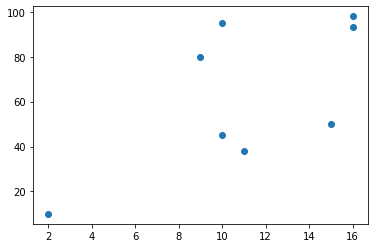

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = [[10,95],[9,80],[2,10],[15,50],[10,45],[16,98],[11,38],[16,93]]
data=pd.DataFrame(data)

X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

plt.scatter(X,Y)

from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X,Y)

print(lr.score(X,Y))

print(lr.coef_)

print(lr.intercept_)


** Statement 5: Apply Linear Regression technique of machine learning to analyze the Diabetes
dataset.
Display accuracy of the model.
Find the equation of the best fit line for this data. **

In [216]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X=diabetes.data
Y=diabetes.target

print(X.shape)
print(Y.shape)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
lr.fit(X,Y)

# score, coeff, intercept
print(lr.score(X, Y))
print(lr.coef_)
print(lr.intercept_)

lr_scores = cross_val_score(lr,X,Y,cv=5)

print(lr_scores.mean())
print("equ of line y= ",lr.coef_.mean(),"x  +  ",lr.intercept_)


(442, 10)
(442,)
0.5177494254132934
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
152.1334841628965
0.48231812211149394
equ of line y=  137.59740575237757 x  +   152.1334841628965


**Statement 6: Apply Linear, Ridge, Lasso Regression technique of machine learning to analyze and 
build the model of the Diabetes dataset.
Display and compare the accuracy (Cross-Validation, R2 Score) of all the models.**

In [152]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso,LassoCV,ElasticNet,ElasticNetCV
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score

In [153]:
diabetes = load_diabetes()

X=diabetes.data
Y=diabetes.target

In [154]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 0)

In [155]:
print(X.shape)
print(Y.shape)

(442, 10)
(442,)


In [156]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr_scores = cross_val_score(lr,X_train,Y_train,cv=5)
lr_scores.mean()
predicted = lr.predict(np.array(X_test))
print(r2_score(Y_test, predicted))

0.33222203269065176


In [157]:
#Ridge Regression
rg=Ridge(alpha=0.5)
rg.fit(X_train,Y_train)
rg_score=cross_val_score(rg,X_train,Y_train,cv=5)
rg_score.mean()
print(rg_score.mean())
predictedrg = rg.predict(np.array(X_test))
print(r2_score(Y_test, predictedrg))


0.4831010073360832
0.35667773997495866


In [158]:
rgcv=RidgeCV(alphas=[0.01,0.02,0.04,0.05,0.1,0.2,0.5])
rgcv.fit(X_train, Y_train)
rgcv.alpha_
rgcv_score=cross_val_score(rgcv,X_train,Y_train,cv=5)
rgcv_score.mean()
print(rgcv_score.mean())
predictedrgcv=rgcv.predict(np.array(X_test))
print(rgcv.alpha_)
print(r2_score(Y_test, predictedrgcv))

0.5267146663641525
0.05
0.3352254638757016


In [159]:
#Lasso Regression
ls=Lasso(alpha=0.5)
ls.fit(X_train,Y_train)
ls_score=cross_val_score(ls,X_train,Y_train,cv=5)
ls_score.mean()
print(ls_score.mean())
predictedls = ls.predict(np.array(X_test))
print(r2_score(Y_test, predictedls))

0.47693271046912294
0.32079705910319434


In [160]:
lscv=LassoCV(alphas=[0.01,0.02,0.04,0.05,0.1,0.2,0.5])
lscv.fit(X_train, Y_train)
lscv.alpha_
lscv_score=cross_val_score(lscv,X_train,Y_train,cv=5)
lscv_score.mean()
print(lscv_score.mean())
predictedlscv=rgcv.predict(np.array(X_test))
print(lscv.alpha_)
print(r2_score(Y_test, predictedlscv))

0.5249695465757533
0.02
0.3352254638757016


In [161]:
en=ElasticNet(alpha=0.01,l1_ratio=0.7)
en.fit(X_train,Y_train)
en_score=cross_val_score(en,X_train,Y_train,cv=10)
en_score.mean()
print(en_score)
print(en_score.mean())
predicteden=en.predict(np.array(X_test))
print(r2_score(Y_test, predicteden))

[0.47104352 0.38554117 0.52250681 0.38101343 0.43473701 0.42665015
 0.25230521 0.55321175 0.51101106 0.45885135]
0.43968714600066755
0.3378721592096908


In [162]:
encv=ElasticNetCV(alphas=[1,0.1,0.01,0.005,0.0025],l1_ratio=[0.7,0.8,0.65,0.85,0.60])
encv.fit(X_train, Y_train)
encv.alpha_
encv_score=cross_val_score(lscv,X_train,Y_train,cv=10)
encv_score.mean()
print(lscv_score.mean())
predictedencv=rgcv.predict(np.array(X_test))
print(encv.alpha_)
print(r2_score(Y_test, predictedencv))

0.5249695465757533
0.0025
0.3352254638757016


<BarContainer object of 4 artists>

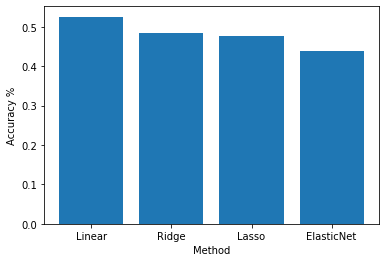

In [163]:
import matplotlib.pyplot as plt
x = ['Linear', 'Ridge','Lasso', 'ElasticNet']
y = [lr_scores.mean(),rg_score.mean(),ls_score.mean(),en_score.mean()]
plt.xlabel("Method")
plt.ylabel("Accuracy %")
plt.bar(x,y)


**Statement 7: Apply Decision Tree Classification technique to solve given problem:
A dataset collected in a cosmetics shop showing details of customers and whether or not 
they responded to a special offer to buy a new lip-stick is shown in table below. Use this 
dataset to build a decision tree, with Buys as the target variable, to help in buying lip-sticks 
in the future. Find the root node of decision tree. According to the decision tree you have 
made from previous training data set, what is the decision for the test data: [Age < 21, 
Income = Low, Gender = Female, Marital Status = Married]?**

In [172]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn import tree

In [165]:
dataset = {
'Id':[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
'Age':['<21','<21','21-35','>35','>35','>35','21-35','<21','<21','>35','<21','21-35','21-35','>35'],
'Income':['High','High','High','Medium','Low','Low','Low','Medium','Low','Medium','Medium','Medium','High','Medium'],
'Gender':['Male','Male','Male','Male','Female','Female','Female','Male','Female','Female','Female','Male','Female','Male'],
'MaritalStatus':['Single','Married','Single','Single','Single','Married','Married','Single','Married','Single','Married','Married','Single','Married'],
'Buys':['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']}

In [166]:
df=pd.DataFrame(dataset)
df

,Id,Age,Income,Gender,MaritalStatus,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


In [167]:
X=df.iloc[:,1:-1]
Y=df["Buys"]

In [168]:
le=LabelEncoder();
x=X.apply(le.fit_transform)
x

,Age,Income,Gender,MaritalStatus
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,0
6,0,1,0,0
7,1,2,1,1
8,1,1,0,0
9,2,2,0,1


In [169]:
print("Age:",list(zip(df.iloc[:,0], x.iloc[:,0])))
print("Income:",list(zip(df.iloc[:,1], x.iloc[:,1])))
print("Gender:",list(zip(df.iloc[:,2], x.iloc[:,2])))
print("MaritialStatus:",list(zip(df.iloc[:,3], x.iloc[:,3])))

Age: [(1, 1), (2, 1), (3, 0), (4, 2), (5, 2), (6, 2), (7, 0), (8, 1), (9, 1), (10, 2), (11, 1), (12, 0), (13, 0), (14, 2)]
Income: [('<21', 0), ('<21', 0), ('21-35', 0), ('>35', 2), ('>35', 1), ('>35', 1), ('21-35', 1), ('<21', 2), ('<21', 1), ('>35', 2), ('<21', 2), ('21-35', 2), ('21-35', 0), ('>35', 2)]
Gender: [('High', 1), ('High', 1), ('High', 1), ('Medium', 1), ('Low', 0), ('Low', 0), ('Low', 0), ('Medium', 1), ('Low', 0), ('Medium', 0), ('Medium', 0), ('Medium', 1), ('High', 0), ('Medium', 1)]
MaritialStatus: [('Male', 1), ('Male', 0), ('Male', 1), ('Male', 1), ('Female', 1), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Female', 1), ('Female', 0), ('Male', 0), ('Female', 1), ('Male', 0)]


In [170]:
print(Y)

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Buys, dtype: object


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


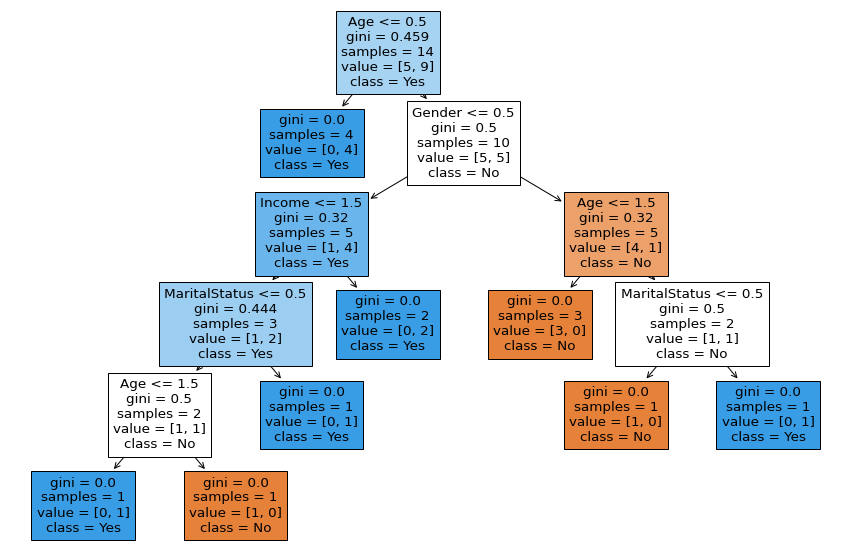

In [175]:
dt=DecisionTreeClassifier()
dt.fit(x,Y)

query=np.array([1,1,0,0])
pred=dt.predict([query])
pred[0]

# export_graphviz(dt,out_file="data1.dot",feature_names=x.columns,class_names=["No","Yes"])
# !dot -Tpng data1.dot -o tree1.png
# Image("tree1.png")

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt, 
                   feature_names=x.columns,  
                   class_names=["No","Yes"],
                   filled=True)


**Statement 8: Apply k-NN Classification technique to solve given problem: 
In the following diagram let blue circles indicate positive examples and orange squares 
indicate negative examples. We want to use k-NN algorithm for classifying the points. If 
k=3, find the class of the point (6,6).**

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets
import seaborn as sns

In [177]:
dataset=np.array([[2,4,'negative'],[4,6,'negative'],[4,4,'positive'],[4,2,'negative'],[6,4,'negative'],[6,2,'positive']])

In [180]:
X=dataset[:,:-1]
y=dataset[:,-1]
print(X,y)

[['2' '4']
 ['4' '6']
 ['4' '4']
 ['4' '2']
 ['6' '4']
 ['6' '2']] ['negative' 'negative' 'positive' 'negative' 'negative' 'positive']


In [181]:
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(X,y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,


KNeighborsClassifier(n_neighbors=3)

In [183]:
#GENERAL KNN

#passing of whole dataset
y_pred_g=classifier.predict(X)
print("general KNN: ",y_pred_g)

#as per question
X_test=np.array([6,6])
y_pred=classifier.predict([X_test])
print("general KNN: ",y_pred)

general KNN:  ['negative' 'negative' 'negative' 'positive' 'positive' 'negative']
general KNN:  ['negative']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [185]:
#WEIGHTED

weighted_classifier=KNeighborsClassifier(n_neighbors=3, weights="distance")
weighted_classifier.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,


KNeighborsClassifier(n_neighbors=3, weights='distance')

In [188]:
#passing of whole dataset
y_pred_w=weighted_classifier.predict(X)
print("weighted KNN: ",y_pred_w)

#as per question
X_testw=np.array([6,6])
y_predw=weighted_classifier.predict([X_testw])
print("Weighted KNN: " ,y_predw)

weighted KNN:  ['negative' 'negative' 'positive' 'negative' 'negative' 'positive']
Weighted KNN:  ['negative']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [189]:
#Neasrest Centroid

ncentroid=NearestCentroid()
ncentroid.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,


NearestCentroid()

In [191]:
#whole dataset
y_pred_n=ncentroid.predict(X)
print("Nearest Centroid: ", y_pred_n)

X_testn=np.array([6,6])
y_predn=weighted_classifier.predict([X_testn])
print("Neasrest Centroid KNN: " ,y_predn)

Nearest Centroid:  ['negative' 'negative' 'negative' 'positive' 'positive' 'positive']
Neasrest Centroid KNN:  ['negative']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [192]:
print("Accuracy score of general KNN is: ", accuracy_score(y,y_pred_g))
print("Accuracy score of weighted KNN is: ", accuracy_score(y,y_pred_w))
print("Accuracy score of nearest centroid KNN is: ", accuracy_score(y,y_pred_n))

Accuracy score of general KNN is:  0.3333333333333333
Accuracy score of weighted KNN is:  1.0
Accuracy score of weighted KNN is:  0.5


Confusion matrix for general KNN is:  [[2 2]
 [2 0]]
Confusion matrix for weighted KNN is:  [[4 0]
 [0 2]]
Confusion matrix for nearest centroid KNN is:  [[2 2]
 [1 1]]


Text(0.5, 1.0, 'Confusion Matrix')

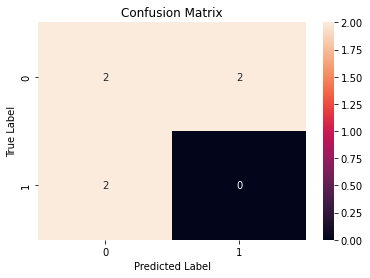

In [209]:
a=confusion_matrix(y,y_pred_g)
b=confusion_matrix(y,y_pred_w)
c=confusion_matrix(y,y_pred_n)
print("Confusion matrix for general KNN is: ", confusion_matrix(y,y_pred_g))
print("Confusion matrix for weighted KNN is: ", confusion_matrix(y,y_pred_w))
print("Confusion matrix for nearest centroid KNN is: ", confusion_matrix(y,y_pred_n))

conf_matrix=a
sns.heatmap(conf_matrix,annot=True,cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')


Text(0.5, 1.0, 'Confusion Matrix')

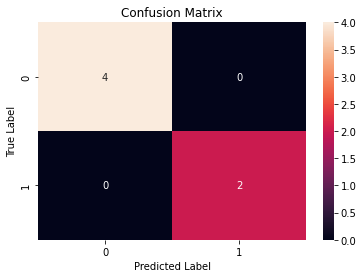

In [208]:

confu_matrix=b
sns.heatmap(confu_matrix,annot=True,cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')


Text(0.5, 1.0, 'Confusion Matrix')

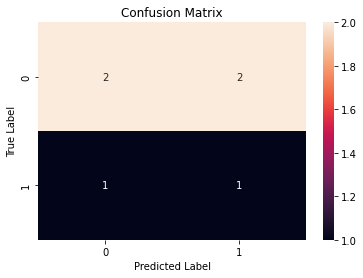

In [206]:
confus_matrix=c
sns.heatmap(confus_matrix,annot=True,cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

**Statement 9: Consider the following training data set. Write a program to construct a decision tree 
using ID3 algorithm. Display Accuracy measures for the same and predict a class of 
suitable query.**

In [220]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn import tree

In [226]:
datasets = {
'Day':['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14'],
'OutLook':['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast','Sunny','Sunny','Rain','Sunny','Overcast','Overcast','Rain'],
'Temperature':['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild'],
'Humidity':['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal','Normal','High','Normal','High'],
'Wind':['Weak','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Strong'],
'PlayTennis':['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']}

In [227]:
df=pd.DataFrame(datasets)
df

,Day,OutLook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [228]:
X=df.iloc[:,1:-1]
Y=df["PlayTennis"]

In [229]:
laen=LabelEncoder();
x=X.apply(laen.fit_transform)
x

,OutLook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [230]:
print("Outllok:",list(zip(df.iloc[:,0], x.iloc[:,0])))
print("Temperature:",list(zip(df.iloc[:,1], x.iloc[:,1])))
print("Humidity:",list(zip(df.iloc[:,2], x.iloc[:,2])))
print("Wind:",list(zip(df.iloc[:,3], x.iloc[:,3])))

Outllok: [('D1', 2), ('D2', 2), ('D3', 0), ('D4', 1), ('D5', 1), ('D6', 1), ('D7', 0), ('D8', 2), ('D9', 2), ('D10', 1), ('D11', 2), ('D12', 0), ('D13', 0), ('D14', 1)]
Temperature: [('Sunny', 1), ('Sunny', 1), ('Overcast', 1), ('Rain', 2), ('Rain', 0), ('Rain', 0), ('Overcast', 0), ('Sunny', 2), ('Sunny', 0), ('Rain', 2), ('Sunny', 2), ('Overcast', 2), ('Overcast', 1), ('Rain', 2)]
Humidity: [('Hot', 0), ('Hot', 0), ('Hot', 0), ('Mild', 0), ('Cool', 1), ('Cool', 1), ('Cool', 1), ('Mild', 0), ('Cool', 1), ('Mild', 1), ('Mild', 1), ('Mild', 0), ('Hot', 1), ('Mild', 0)]
Wind: [('High', 1), ('High', 0), ('High', 1), ('High', 1), ('Normal', 1), ('Normal', 0), ('Normal', 0), ('High', 1), ('Normal', 1), ('Normal', 1), ('Normal', 0), ('High', 0), ('Normal', 1), ('High', 0)]


In [231]:
print(Y)

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: PlayTennis, dtype: object


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


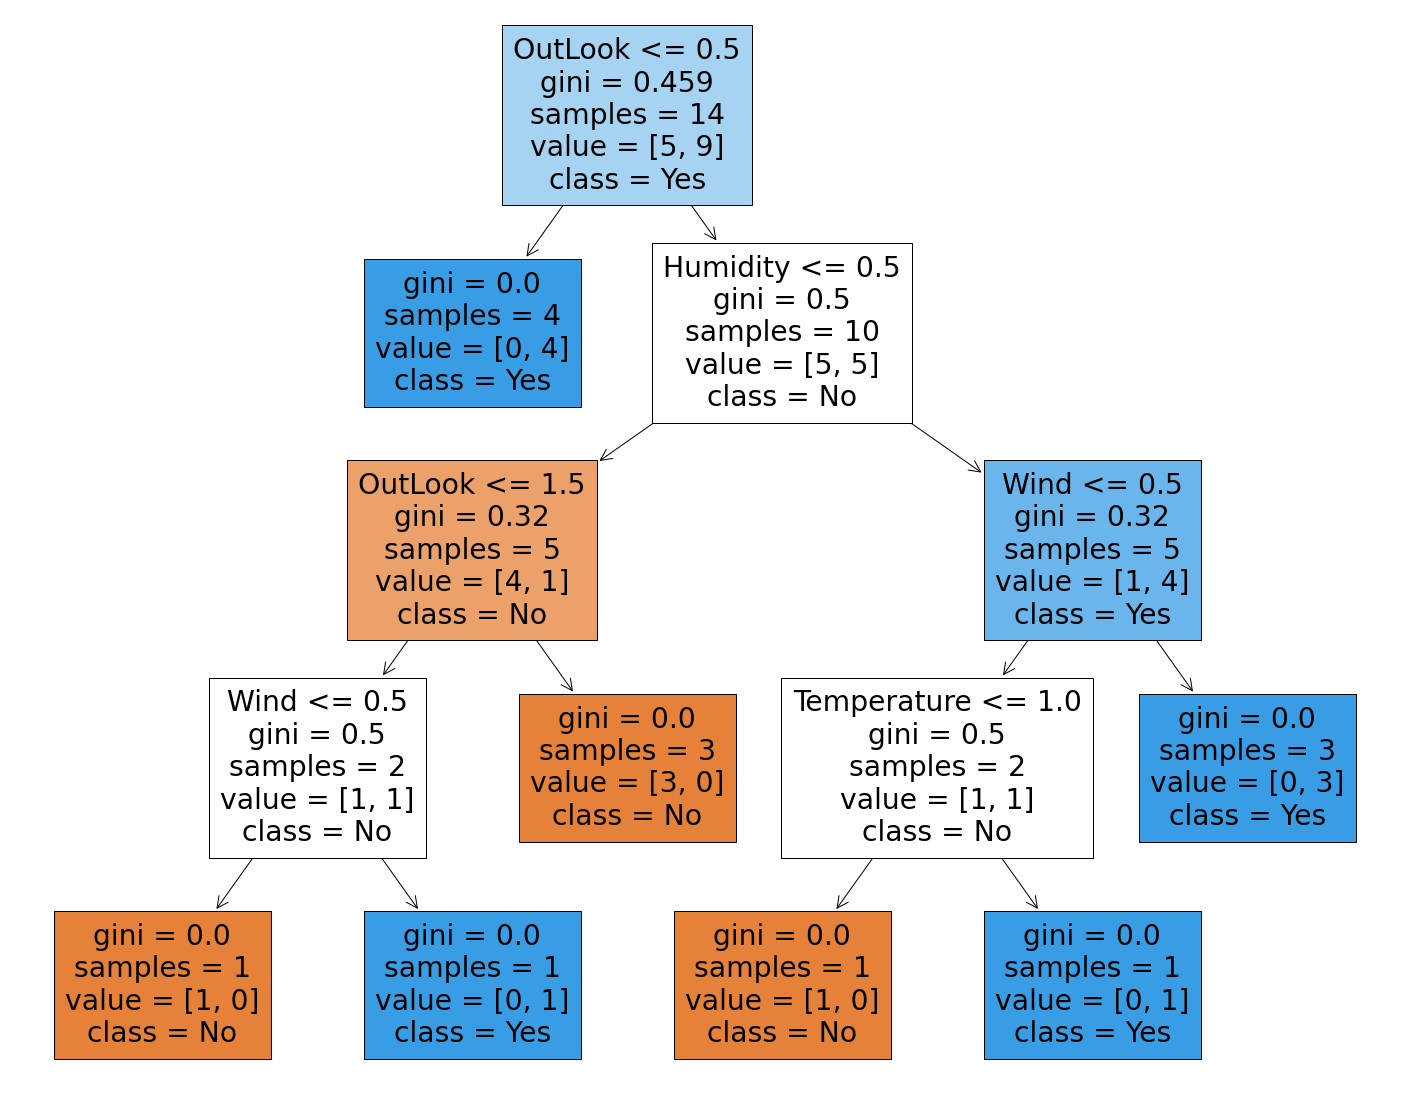

In [235]:
dtc=DecisionTreeClassifier()
dtc.fit(x,Y)

queryy=np.array([1,1,0,0])
predi=dtc.predict([queryy])
predi[0]

# export_graphviz(dt,out_file="data1.dot",feature_names=x.columns,class_names=["No","Yes"])
# !dot -Tpng data1.dot -o tree1.png
# Image("tree1.png")

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=x.columns,  
                   class_names=["No","Yes"],
                   filled=True)

**Statememt 10: Consider tissue paper factory application. Apply KNN algorithm to find class of new 
tissue paper (X1= 3, X2=7). Assume K=3
X1 = Acid Durability 
(seconds) 
X2 = Strength (kg/square 
meter) 
Y = Classification 
7 7 Bad 
7 4 Bad 
3 4 Good 
1 4 Good**

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

data = np.array([[7,7,'B'],[7,4,'B'],[3,4,'G'],[1,4,'G']])

A=data[:,:-1]
b=data[:,-1]
print(A,b)

[['7' '7']
 ['7' '4']
 ['3' '4']
 ['1' '4']] ['B' 'B' 'G' 'G']


In [242]:
classifiers=KNeighborsClassifier(n_neighbors=3)
classifiers.fit(A,b)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,


KNeighborsClassifier(n_neighbors=3)

In [248]:
b_pred_g=classifiers.predict(A)
print("KNN:", b_pred_g)

A_test=np.array([3,7])
b_pred=classifiers.predict([A_test])
print("general KNN: ",b_pred)

KNN: ['B' 'B' 'G' 'G']
general KNN:  ['G']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


Accuracy score of  KNN is:  1.0
Confusion matrix for general KNN is:  [[2 0]
 [0 2]]


Text(0.5, 1.0, 'Confusion Matrix')

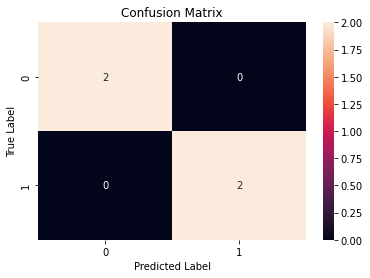

In [253]:
print("Accuracy score of  KNN is: ", accuracy_score(b,b_pred_g))
print("Confusion matrix for general KNN is: ", confusion_matrix(b,b_pred_g))
d=confusion_matrix(b,b_pred_g)
confusi_matrix=d
sns.heatmap(confusi_matrix,annot=True,cbar=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')